It is not uncommon in real-world applications that our samples are missing one or more values for various reasons. There could have been an error in the data collection process, certain measurements are not applicable, particular fields could have been simply left blank in a survey, for example. We typically see missing  values as the blank spaces in our data table or as placeholder strings such as NaN  (Not A Number).
Unfortunately, most computational tools are unable to handle such missing values or would produce unpredictable results if we simply ignored them. Therefore, it is crucial that we take care of those missing values before we proceed with further analyses. But before we discuss several techniques for dealing with missing values, let's create a simple example data frame from a CSV (comma-separated values) file to get a better grasp of the problem:

In [1]:
import numpy as np
import pandas as pd
from io import StringIO
csv_data= '''A,B,C,D
1,2,3,4
5,6,,8
10,11,12,'''

In [2]:
df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1,2,3.0,4.0
1,5,6,NaN,8.0
2,10,11,12.0,NaN


For a larger DataFrame, it can be tedious to look for missing values manually; in this case, we can use the isnull method to return a DataFrame with Boolean values that indicate whether a cell contains a numeric value (False) or if data is missing (True). Using the sum method, we can then return the number of missing values per column as follows:

In [3]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

We can always convert a dataframe to Numpy array by values method

In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

**Eliminating samples or features with missing values**

In [5]:
#Dropping rows that contains missing values(samples)
df.dropna()

,A,B,C,D
0,1,2,3.0,4.0


In [6]:
#Dropping columns that contains missing values(features)
df.dropna(axis=1)

,A,B
0,1,2
1,5,6
2,10,11


Although the removal of missing data seems to be a convenient approach, it also comes with certain disadvantages; for example, we may end up removing too many samples, which will make a reliable analysis impossible. Or, if we remove too many feature columns, we will run the risk of losing valuable information that our classifier needs to discriminate between classes. In the next section, we will thus  look at one of the most commonly used alternatives for dealing with missing  values: interpolation techniques. 

**Imputing Missing Values**<br>
Often, the removal of samples or dropping of entire feature columns is simply not feasible, because we might lose too much valuable data. In this case, we can use different interpolation techniques to estimate the missing values from the other training samples in our dataset. One of the most common interpolation techniques is **mean imputation, where we simply replace the missing value by the mean value of the entire feature column**. A convenient way to achieve this is by using the Imputer class from scikit-learn, as shown in the following code:

In [7]:
from sklearn.impute import SimpleImputer
imr=SimpleImputer(missing_values=np.nan,strategy='mean')
imr=imr.fit(df)
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

Here, we replaced each NaN value by the corresponding mean, which is separately calculated for each feature column.Other options for the strategy parameter are median or most_frequent, where the latter replaces the missing values by the most frequent values. This is useful for imputing categorical feature values.

**Handling Categorical Data**

It is not uncommon that real-world datasets contain one or more categorical feature columns. When we are talking about categorical data, we have to further distinguish between **nominal** and **ordinal** features. Ordinal features can be understood as categorical values that can be sorted or ordered. For example, T-shirt size would be an ordinal feature, because we can define an order XL > L > M. In contrast, nominal features don't imply any order and, to continue with the previous example, we could think of T-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue. 

In [8]:
df=pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
])
df.columns=['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


As we can see in the preceding output, the newly created DataFrame contains a nominal feature (color), an ordinal feature (size), and a numerical feature (price) column. 

**Mapping Ordinal Features**<br>
Learning algorithms for classification do not use ordinal information. To make sure that the learning algorithm interprets the ordinal features correctly, we need to convert the categorical string values into integers. Unfortunately, there is no convenient function that can automatically derive the correct order of the labels of our size feature. Thus, we have to define the mapping manually. 

In [9]:
mapping = {'M':1,'L':2,'XL':3}
df=df.replace({'size':mapping})

In [10]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


**Encoding Class Labels**

In [11]:
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
y=class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

**Performing one-hot Encoding on nominal feature**

Since nominal features does not come in any order so we can not label encode them. Because if we do that one type of ordering will be created and our learning algorithm will assume that ordering, so the results would not be optimal.<br>
A common workaround for this problem is to use a technique called **one-hot encoding**. The idea behind this approach is to create a new dummy feature for each unique value in the nominal feature column. Here, we would convert the color feature into three new features: blue, green, and red. Binary values can then be used to indicate the particular color of a sample; for example, a blue sample can be encoded as blue=1, green=0, red=0.

In [12]:
X=df[['color','size','price']].values
color_le=LabelEncoder()
X[:,0]=color_le.fit_transform(X[:,0])
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\_encoders.py:450: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [13]:
#Simple way to do the above task
print(pd.get_dummies(df[['price','color','size']]))
pd.get_dummies(df[['price','color','size']]).values

   price  size  color_blue  color_green  color_red
0   10.1     1           0            1          0
1   13.5     2           0            0          1
2   15.3     3           1            0          0


array([[10.1,  1. ,  0. ,  1. ,  0. ],
       [13.5,  2. ,  0. ,  0. ,  1. ],
       [15.3,  3. ,  1. ,  0. ,  0. ]])

**Partitioning a dataset in training and test sets**<br>
In this section, we will prepare a new dataset, the Wine dataset. After we have preprocessed the dataset, we will explore different techniques for feature selection to reduce the dimensionality of a dataset. The Wine dataset is another open-source dataset that is available from the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/Wine); it consists of 178 wine samples with 13 features describing their different chemical properties. 

In [14]:
from sklearn.datasets import load_wine
data=load_wine()

In [15]:
df_wine=pd.DataFrame(data.data,columns=data.feature_names)
df_wine['Class label']=pd.Series(data.target)
print('Class Labels',np.unique(df_wine['Class label']))
df_wine.columns

Class Labels [0 1 2]


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Class label'],
      dtype='object')

In [16]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


A convenient way to randomly partition this dataset into a separate test and  training dataset is to use the train_test_split function from scikit-learn's  cross_validation submodule

In [95]:
from sklearn.model_selection import train_test_split
X,y=df_wine.iloc[:,:13].values,df_wine.iloc[:,13].values
print(X.shape)
print(y.shape)
# print(X[:,0])


(178, 13)
(178,)


In [72]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [73]:
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


Feature Scaling

MinMaxScaler

In [74]:
X_train[0]

array([1.371e+01, 1.860e+00, 2.360e+00, 1.660e+01, 1.010e+02, 2.610e+00,
       2.880e+00, 2.700e-01, 1.690e+00, 3.800e+00, 1.110e+00, 4.000e+00,
       1.035e+03])

In [75]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.transform(X_test)

In [76]:
X_train_norm[0]

array([0.72043011, 0.20378151, 0.53763441, 0.30927835, 0.33695652,
       0.54316547, 0.73700306, 0.25      , 0.40189873, 0.24068768,
       0.48717949, 1.        , 0.5854251 ])

StandardScaler

In [77]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.transform(X_test)

In [78]:
X_train_std[0]
y_train[0]

0

In [79]:
from sklearn.linear_model import LogisticRegression
lamda=[1e-4,1e-3,1e-2,1e-1,1,10,100,1000]
training_accuracy=[]
test_accuracy=[]
for i in range(len(lamda)):
    lr=LogisticRegression(penalty='l1',C=lamda[i])
    lr.fit(X_train_std,y_train)
    training_accuracy.append(lr.score(X_train_std,y_train))
    test_accuracy.append(lr.score(X_test_std,y_test))

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

In [80]:
print(training_accuracy)
print(test_accuracy)

[0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.9838709677419355, 0.9919354838709677, 1.0, 1.0, 1.0]
[0.35185185185185186, 0.35185185185185186, 0.35185185185185186, 0.9814814814814815, 1.0, 1.0, 1.0, 1.0]


In [81]:
lr=LogisticRegression(penalty='l1',C=0.1)
lr.fit(X_train_std,y_train)
print('Training accuracy:',lr.score(X_train_std,y_train))
print('Test accuracy: ',lr.score(X_test_std,y_test))

Training accuracy: 0.9838709677419355
Test accuracy:  0.9814814814814815


C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [82]:
lr.intercept_

array([-0.38377176, -0.15806835, -0.70046   ])

In [83]:
lr.coef_

array([[ 0.2799698 ,  0.        ,  0.        , -0.02789537,  0.        ,
         0.        ,  0.70996766,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23678326],
       [-0.64401906, -0.06878112, -0.05719588,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92681047,
         0.06019482,  0.        , -0.37102636],
       [ 0.        ,  0.06149914,  0.        ,  0.        ,  0.        ,
         0.        , -0.63558374,  0.        ,  0.        ,  0.49792375,
        -0.35830743, -0.57175226,  0.        ]])

We notice that the weight vectors are sparse, which means that they only have a few non-zero entries. As a result of the L1 regularization, which serves as a method for feature selection, we just trained a model that is robust to the potentially irrelevant features in this dataset. 

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

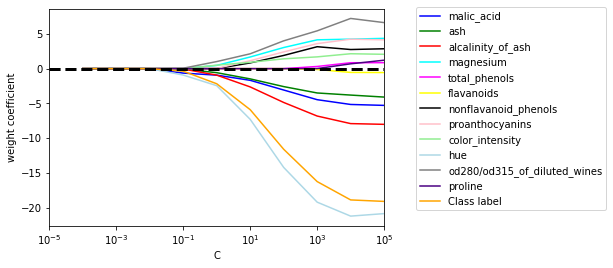

In [84]:
import math
import matplotlib.pyplot as plt
fig=plt.figure()
ax=plt.subplot(111)
colors=['blue','green','red','cyan',
       'magenta','yellow','black',
       'pink','lightgreen','lightblue',
       'gray','indigo','orange']
weights,params=[], []
for c in np.arange(-4,6):
    lr=LogisticRegression(penalty='l1',
                         C=math.pow(10,c),
                         random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(math.pow(10,c))

weights=np.array(weights)
for column,color in zip(range(weights.shape[1]),colors):
    plt.plot(params,weights[:,column],
            label=df_wine.columns[column+1],
            color=color)
plt.axhline(0,color='black',linestyle='--',linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
         bbox_to_anchor=(1.38,1.03),
         ncol=1,fancybox=True)
plt.show()

**Simple Backward Selection for feature selection**

In [85]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [86]:
class SBS():
    def __init__(self,estimator,k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring=scoring
        self.estimator=clone(estimator)
        self.k_features=k_features
        self.test_size=test_size
        self.random_state=random_state
        
    def fit(self,X,y):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=self.test_size,random_state=self.random_state)
        dim=X_train.shape[1]
        self.indices_=tuple(range(dim))
        self.subsets_=[self.indices_]
        score=self._calc_score(X_train,y_train,X_test,y_test,self.indices_)
        self.scores_=[score]
        
        while dim>self.k_features:
            scores=[]
            subsets=[]
            for p in combinations(self.indices_,r=dim-1):
                score=self._calc_score(X_train,y_train,X_test,y_test,p)
                scores.append(score)
                subsets.append(p)
                
            best=np.argmax(scores)
            self.indices_=subsets[best]
            self.subsets_.append(self.indices_)
            dim-=1
            self.scores_.append(scores[best])
        
        self.k_score_=self.scores_[-1]
        return self
    def transform(self,X):
        return X[:,self.indices_]
    def _calc_score(self,X_train,y_train,X_test,y_test,indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred=self.estimator.predict(X_test[:,indices])
        score=self.scoring(y_test,y_pred)
        return score

In the preceding implementation, we defined the k_features parameter to  specify the desired number of features we want to return. By default, we use the accuracy_score from scikit-learn to evaluate the performance of a model and estimator for classification on the feature subsets. Inside the while loop of the fit method, the feature subsets created by the itertools.combination function are evaluated and reduced until the feature subset has the desired dimensionality. In each iteration, the accuracy score of the best subset is collected in a list self. scores_ based on the internally created test dataset X_test. We will use those scores later to evaluate the results. The column indices of the final feature subset are assigned to self.indices_, which we can use via the transform method to return a new data array with the selected feature columns. Note that, instead of calculating the criterion explicitly inside the fit method, we simply removed the feature that is not contained in the best performing feature subset. 

In [87]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn=KNeighborsClassifier(n_neighbors=2)
sbs=SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

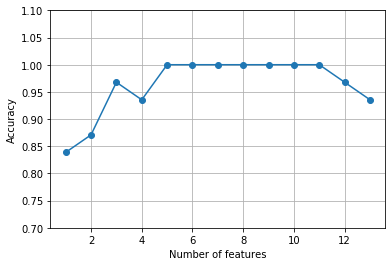

In [88]:
k_feat=[len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

As we can see in the following plot, the accuracy of the KNN classifier improved on the validation dataset as we reduced the number of features, which is likely due to a decrease of the **curse of dimensionality** 

In [89]:
sbs.scores_

[0.9354838709677419,
 0.967741935483871,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9354838709677419,
 0.967741935483871,
 0.8709677419354839,
 0.8387096774193549]

let's see what those five features are that yielded such a good performance on the validation dataset:

In [90]:
k5=list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['malic_acid', 'ash', 'magnesium', 'od280/od315_of_diluted_wines',
       'Class label'],
      dtype='object')


Next let's evaluate the performance of the KNN classifier on the original test set:

In [91]:
knn.fit(X_train_std,y_train)
# print(X_train_std.shape)
print('Training accuracy: ',knn.score(X_train_std,y_train))
print('Test accuracy: ',knn.score(X_test_std,y_test))

Training accuracy:  0.9838709677419355
Test accuracy:  0.9444444444444444


Now let's use the selected 5-feature subset and see how well KNN performs

In [92]:
knn.fit(X_train_std[:,k5], y_train)
print('Training accurcay: ',knn.score(X_train_std[:,k5], y_train))
print('Test accurcay: ',knn.score(X_test_std[:,k5], y_test))

Training accurcay:  0.9596774193548387
Test accurcay:  0.9629629629629629


**Assessing feature importance with random forests**

In [93]:
from sklearn.ensemble import RandomForestClassifier
feat_labels=df_wine.columns[1:]
forest=RandomForestClassifier(n_estimators=10000,
                             random_state=0,
                             n_jobs=-1)
forest.fit(X_train,y_train)
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[f],importances[indices[f]]))

 1) malic_acid                     0.182483
 2) ash                            0.158610
 3) alcalinity_of_ash              0.150948
 4) magnesium                      0.131987
 5) total_phenols                  0.106589
 6) flavanoids                     0.078243
 7) nonflavanoid_phenols           0.060718
 8) proanthocyanins                0.032033
 9) color_intensity                0.025400
10) hue                            0.022351
11) od280/od315_of_diluted_wines   0.022078
12) proline                        0.014645
13) Class label                    0.013916
